In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('spam.csv', encoding = 'latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data cleaning

In [4]:
data = data[['v1','v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# change column names
data.columns = ['target','text']

In [6]:
data.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [7]:
# encoding the target column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
data.target = encoder.fit_transform(data.target)

In [9]:
data.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [10]:
# Check null values
data.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check duplicate values and remove duplicates
data.duplicated().sum()

403

In [12]:
data = data.drop_duplicates(keep = 'first')

In [13]:
data.duplicated().sum()

0

## Exploratory data analysis

```
How is data distributed on the basis of target columns
Is data is balanced or imbalanced
```

In [14]:
import matplotlib.pyplot as plt

In [15]:
data.target.value_counts(normalize = 'True').mul(100)

0    87.366996
1    12.633004
Name: target, dtype: float64

```
Data is imbalaced as there is 87 % of non spam and remaining 13 % is spam
```

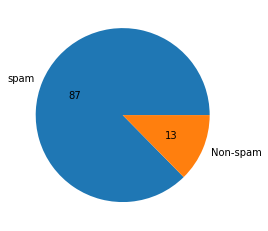

In [16]:
plt.pie(data.target.value_counts(),labels= ['spam','Non-spam'],autopct = '%0.f')
plt.show()

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data['textlen'] = data.text.apply(len)

In [19]:
data.head(2)

,target,text,textlen
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [20]:
# Adding new column giving number of words present in text
data['wordlen'] = data.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
# Adding new column giving number of sentences present in text 
data['sentlen'] = data.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
data.sample(3)

,target,text,textlen,wordlen,sentlen
3164,0,Cheers for the card ... Is it that time of yea...,56,13,1
1509,0,When u love someone Dont make them to love u a...,148,36,2
4829,0,"The word \Checkmate\"" in chess comes from the ...",145,38,1


In [23]:
data[data.target == 1].describe()

,target,textlen,wordlen,sentlen
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.701378,2.980092
std,0.0,30.137753,7.005779,1.491665
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [24]:
import seaborn as sns

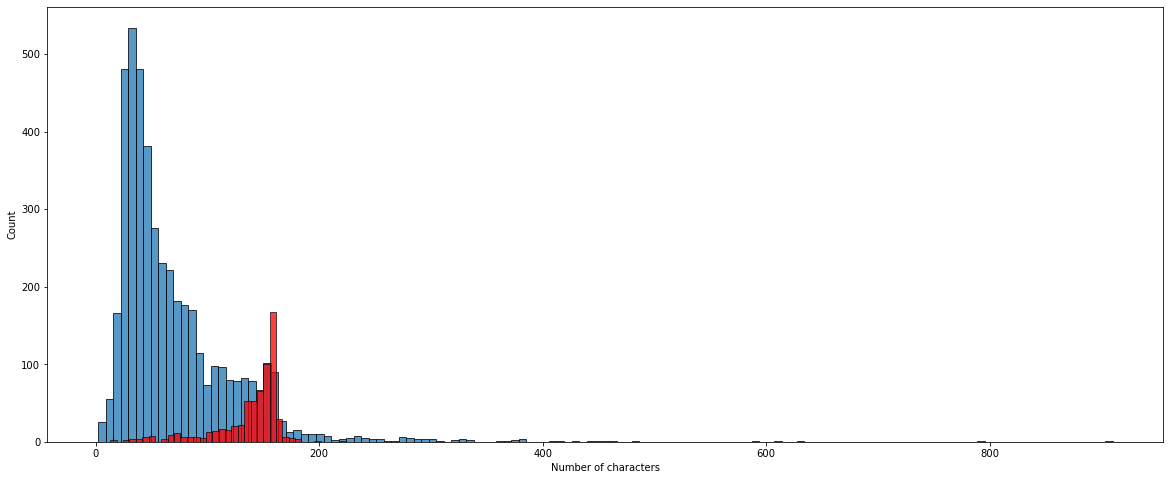

In [25]:
plt.figure(figsize=(20,8))
sns.histplot(data.textlen[data.target == 0])
sns.histplot(data.textlen[data.target == 1],color='red')
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.show()

```
From the above histogram it is easily seen that, Red colured bars are of spam messeges and Most of the spam messeges have more text length than non spam messeges. 
```

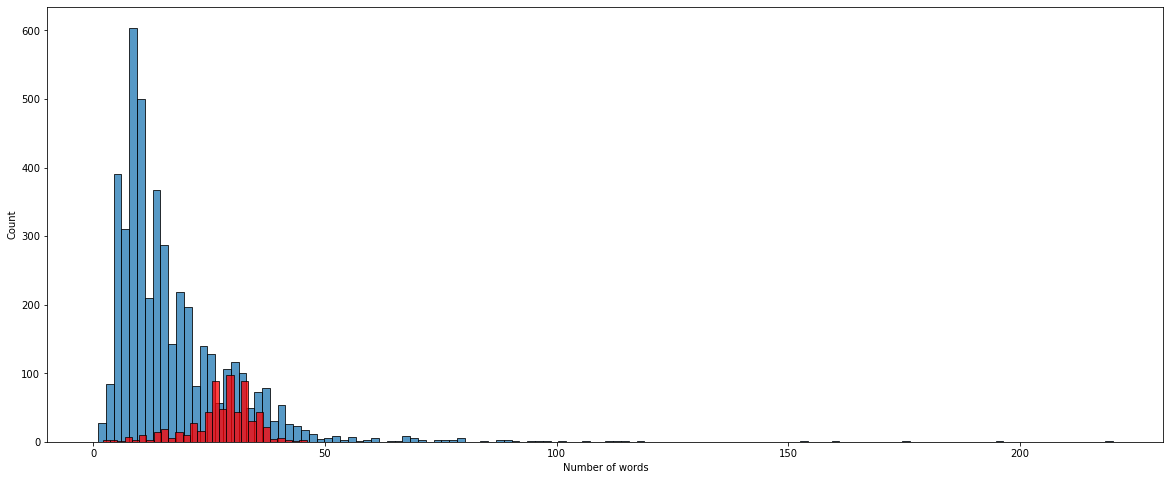

In [26]:
plt.figure(figsize=(20,8))
sns.histplot(data.wordlen[data.target == 0])
sns.histplot(data.wordlen[data.target == 1],color='red')
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.show()

In [27]:
data.head(2)

,target,text,textlen,wordlen,sentlen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


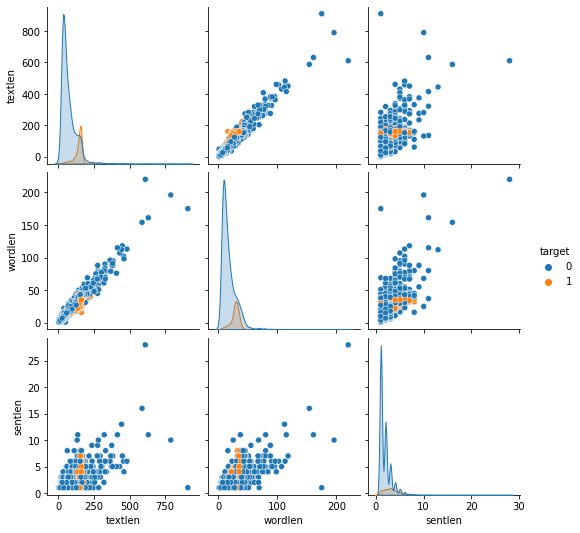

In [28]:
sns.pairplot(data, hue = 'target')
plt.show()

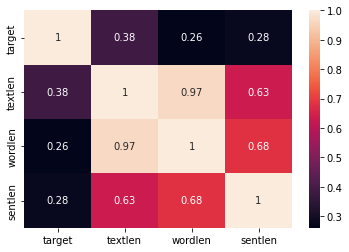

In [29]:
sns.heatmap(data.corr(),annot = True)
plt.show()

```
From above heatmap, we can see there is multicolinearity with each other.
```

## Data Preprocessing in NLP 

```
lower case 
Tokenization
Removing special characters
Removing stop words and punctuations
stemming
```

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
def preprocessor(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ls = []
    for i in text:
        if i.isalnum():
            ls.append(i)
            
    text = ls[:]
    ls.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            ls.append(i)
            
    text = ls[:]
    ls.clear()
    
    for i in text:
        ls.append(ps.stem(i))
        
    return ' '.join(ls)

In [32]:
data['processed_text'] = data.text.apply(preprocessor)

In [33]:
data.head(3)

,target,text,textlen,wordlen,sentlen,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [34]:
from wordcloud import WordCloud
word_cloud = WordCloud(background_color='white',width=1000,height=600)

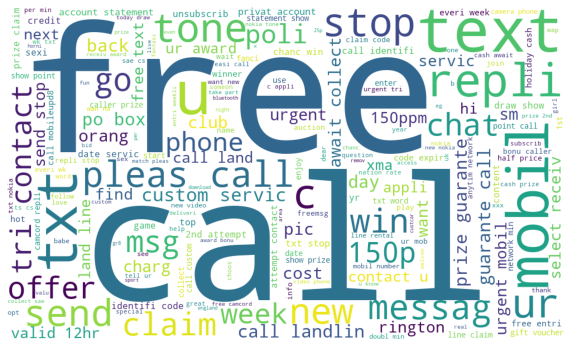

In [35]:
# word cloud for spam messeges
word_cloud1 = word_cloud.generate(data.processed_text[data.target==1].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(word_cloud1)
plt.axis('off')
plt.savefig('wordcloud_spam.png',dpi=500)
plt.show()

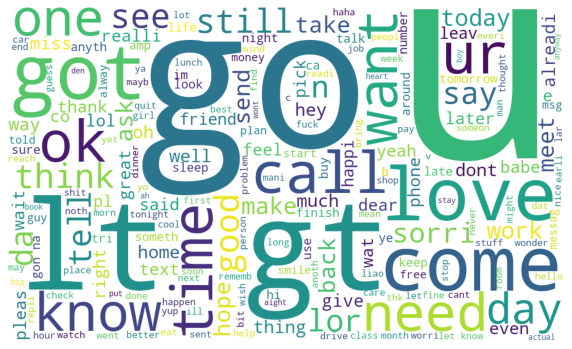

In [36]:
# word cloud for Non spam messeges
word_cloud2 = word_cloud.generate(data.processed_text[data.target==0].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(word_cloud2)
plt.axis('off')
plt.savefig('wordcloud_nonspam.png',dpi=500)
plt.show()

### Top 50 words in spam messeges words

In [37]:
spam = data.processed_text[data.target==1]
SpamText = ''
for i in spam:
    SpamText = SpamText + i+ ' '
SpamText= SpamText.split()

In [38]:
from collections import Counter
top_spam = Counter(SpamText).most_common(30)

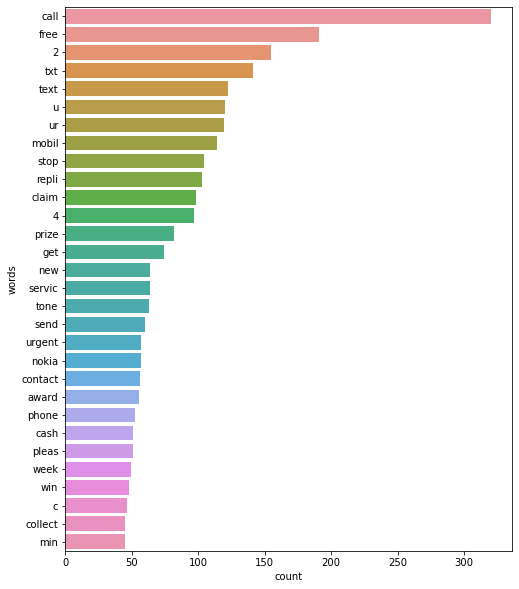

In [39]:
plt.figure(figsize=(8,10))
top_spam = pd.DataFrame(top_spam)
top_spam.columns = ['words','count']
sns.barplot(x= top_spam['count'],y =  top_spam['words'])
plt.show()

### Top 50 words in Non spam messeges words

In [40]:
NonSpam = data.processed_text[data.target==0]
NonSpamText = ''
for i in NonSpam:
    NonSpamText = NonSpamText + i+ ' '
NonSpamText= NonSpamText.split()
top_NonSpam = pd.DataFrame(Counter(NonSpamText).most_common(30),columns=['words','count'])

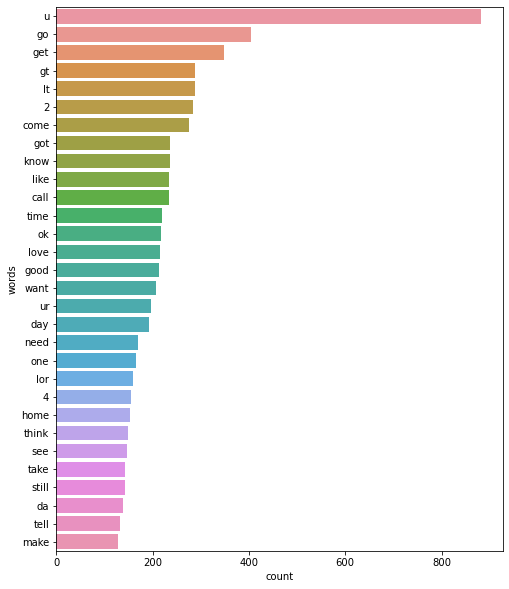

In [41]:
plt.figure(figsize=(8,10))
sns.barplot(x= top_NonSpam['count'],y =  top_NonSpam['words'])
plt.show()

## Building Machine learning model

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [46]:
# Converting text to vector using countvetctorizer
x = cv.fit_transform(data.processed_text).toarray()

In [47]:
# target array
y = np.array(data.target)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [50]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [51]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [52]:
gb.fit(x_train,y_train)
y_pred1 = gb.predict(x_test)

print('*'*5, 'Gaussian Naive Bayes','*'*5,'\n')
print('Accuracy Score =',accuracy_score(y_test,y_pred1))
print('Confusion Metric :\n',confusion_matrix(y_test,y_pred1))
print('Precision Score =',precision_score(y_test,y_pred1))

***** Gaussian Naive Bayes ***** 

Accuracy Score = 0.8781431334622823
Confusion Metric :
 [[790 106]
 [ 20 118]]
Precision Score = 0.5267857142857143


In [53]:
mb.fit(x_train,y_train)
y_pred2 = mb.predict(x_test)

print('*'*5, 'Multinominal Naive Bayes','*'*5,'\n')
print('Accuracy Score =',accuracy_score(y_test,y_pred2))
print('Confusion Metric :\n',confusion_matrix(y_test,y_pred2))
print('Precision Score =',precision_score(y_test,y_pred2))

***** Multinominal Naive Bayes ***** 

Accuracy Score = 0.9642166344294004
Confusion Metric :
 [[871  25]
 [ 12 126]]
Precision Score = 0.8344370860927153


In [54]:
bb.fit(x_train,y_train)
y_pred3 = mb.predict(x_test)

print('*'*5, 'Bernoulli Naive Bayes','*'*5,'\n')
print('Accuracy Score =',accuracy_score(y_test,y_pred3))
print('Confusion Metric :\n',confusion_matrix(y_test,y_pred3))
print('Precision Score =',precision_score(y_test,y_pred3))

***** Bernoulli Naive Bayes ***** 

Accuracy Score = 0.9642166344294004
Confusion Metric :
 [[871  25]
 [ 12 126]]
Precision Score = 0.8344370860927153


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [85]:
x1 = tf.fit_transform(data.processed_text).toarray()

In [66]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y,test_size=0.2,random_state=2)

In [67]:
gb.fit(x1_train,y1_train)
y1_pred1 = gb.predict(x1_test)

print('*'*5, 'Gaussian Naive Bayes','*'*5,'\n')
print('Accuracy Score =',accuracy_score(y1_test,y1_pred1))
print('Confusion Metric :\n',confusion_matrix(y1_test,y1_pred1))
print('Precision Score =',precision_score(y1_test,y1_pred1))

***** Gaussian Naive Bayes ***** 

Accuracy Score = 0.8694390715667312
Confusion Metric :
 [[787 109]
 [ 26 112]]
Precision Score = 0.5067873303167421


In [68]:
mb.fit(x1_train,y1_train)
y1_pred2 = mb.predict(x1_test)

print('*'*5, 'Multinominal Naive Bayes','*'*5,'\n')
print('Accuracy Score =',accuracy_score(y1_test,y1_pred2))
print('Confusion Metric :\n',confusion_matrix(y1_test,y1_pred2))
print('Precision Score =',precision_score(y1_test,y1_pred2))

***** Multinominal Naive Bayes ***** 

Accuracy Score = 0.9729206963249516
Confusion Metric :
 [[896   0]
 [ 28 110]]
Precision Score = 1.0


In [69]:
bb.fit(x1_train,y1_train)
y1_pred2 = bb.predict(x1_test)

print('*'*5, 'Bernoulli Naive Bayes','*'*5,'\n')
print('Accuracy Score =',accuracy_score(y1_test,y1_pred2))
print('Confusion Metric :\n',confusion_matrix(y1_test,y1_pred2))
print('Precision Score =',precision_score(y1_test,y1_pred2))

***** Bernoulli Naive Bayes ***** 

Accuracy Score = 0.9835589941972921
Confusion Metric :
 [[895   1]
 [ 16 122]]
Precision Score = 0.991869918699187


```
Here, using TFIDF countvectorizer and multinominal naive bayes have precision score of 1 and gives the better result.
```

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
adb = AdaBoostClassifier(n_estimators=50, random_state=2)
bgc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgc = XGBClassifier(n_estimators = 50, random_state=2)

In [63]:
clf = {'svc': svc,
       'nb': mb,
      'knn': knn,
      'dtc': dtc,
      'lrc':lrc,
      'rfc':rfc,
      'adb':adb,
      'bgc':bgc,
      'etc':etc,
      'gbc':gbc,
      'xgc':xgc}

In [195]:
def train_model(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return acc, precision

In [204]:
ls = []
for i in clf:
    d = list(train_model(clf[i],x1_train,x1_test,y1_train,y1_test))
    d.append(i)
    d.reverse()
    ls.append(d)

In [205]:
asd = pd.DataFrame(ls,columns=['Model','Precision','Accuracy'])

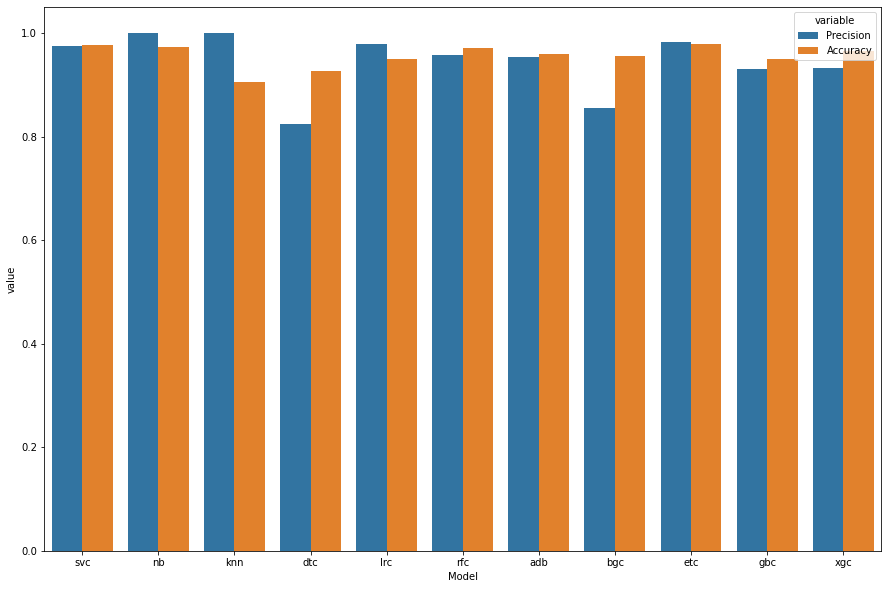

In [206]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Model', y = 'value',data =pd.melt(asd,id_vars='Model'),hue ='variable')
plt.show()

```
From above graph we can see that both Precision and Accuracy score is better for logistic regression model.
```

In [208]:
asd

,Model,Precision,Accuracy
0,svc,0.975000,0.976789
1,nb,1.000000,0.972921
2,knn,1.000000,0.905222
3,dtc,0.824742,0.927466
4,lrc,0.978022,0.950677
5,rfc,0.957627,0.970986
6,adb,0.953271,0.960348
7,bgc,0.854962,0.956480
8,etc,0.983471,0.979691
9,gbc,0.930693,0.950677


In [71]:
import pickle as pkl
pkl.dump(tf,open('tfidf.pkl','wb'))
pkl.dump(mb,open('model.pkl','wb'))

In [76]:
pkl.dump(preprocessor,open('pre.pkl','wb'))

In [83]:
exc = preprocessor('Hi how are you qwr tyu ghj fesacvt 56 gnnn  5en ffgsth ')

In [89]:
mb.predict(tf.transform([exc]).toarray())[0]

0

In [1]:
submission = test[['id','cltv']]

NameError: name 'test' is not defined